Results Expected from this Analysis
- Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 
- Present the overall approach of the analysis in a presentation: 
    - Mention the problem statement and the analysis approach briefly 
    - Explain the results of univariate, bivariate analysis etc. in business terms
    - Include visualisations and summarise the most important results in the presentation

In [141]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

/var/folders/x4/87dx15b933dcrrmqqfysjws00000gr/T/ipykernel_17181/147964038.py:6: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [142]:
#Load the dataset from the zipped file
df = pd.read_csv('loan.zip')

/var/folders/x4/87dx15b933dcrrmqqfysjws00000gr/T/ipykernel_17181/3611009597.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.zip')


In [143]:
#Preview the Loan df
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [144]:
#Clean the data
df['revol_util'] = df['revol_util'].str.replace('%', '')
df['revol_util'] = df['revol_util'].astype(float)

In [145]:
df['emp_length'] = df['emp_length'].fillna(0)

In [146]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)', expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/x4/87dx15b933dcrrmqqfysjws00000gr/T/ipykernel_17181/1204530480.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['emp_length'] = df['emp_length'].str.extract('(\d+)', expand=False)


In [147]:
df['zip3'] = df['zip_code'].astype(str).str[:3].astype(int)

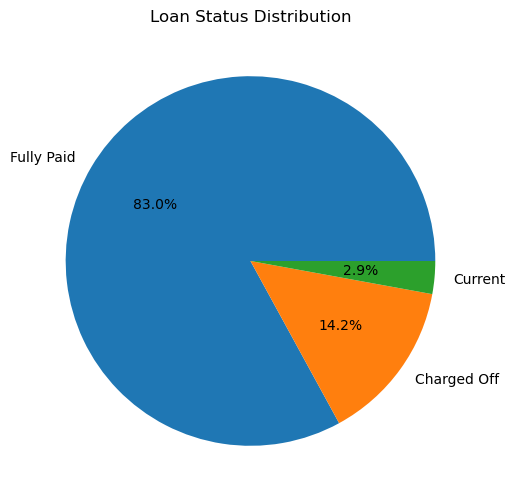

In [148]:
#Counts for each Loan Status
mode_counts = df['loan_status'].value_counts()

#Pie chart of Loan Status
plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.show()

Here we find that:
- 83% of loans are Fully Paid
- 3% are current
- and 14% are Charged Off

Our analysis will focus on better understandig the Charged Off %.

In [169]:
# Create a dictionary to map strings to numbers to support correlation analysis
loan_status_mapping = {'Charged Off': 10, 'Current': 5, 'Fully Paid': 0}

# Create the new column using the map() method
df['loan_status_code'] = df['loan_status'].map(loan_status_mapping)

In [170]:
# Create a dictionary to map strings to numbers
sub_grade_mapping = {'A1': 100, 'A2': 99, 'A3': 98, 'A4': 97, 'A5': 96, 'B1': 95, 'B2': 94,
                'B3': 93, 'B4': 92, 'B5': 91, 'C1': 90, 'C2': 89, 'C3': 88, 'C4': 87,
                'C5': 86, 'D1': 85, 'D2': 84, 'D3': 83, 'D4': 82, 'D5': 81, 'E1': 80,
                'E2': 79, 'E3': 78, 'E4': 77, 'E5': 76, 'G1': 75, 'G2': 74, 'G3': 73,
                'G4': 72, 'G5': 71}

# Create the new column using the map() method
df['sub_grade_code'] = df['sub_grade'].map(sub_grade_mapping)

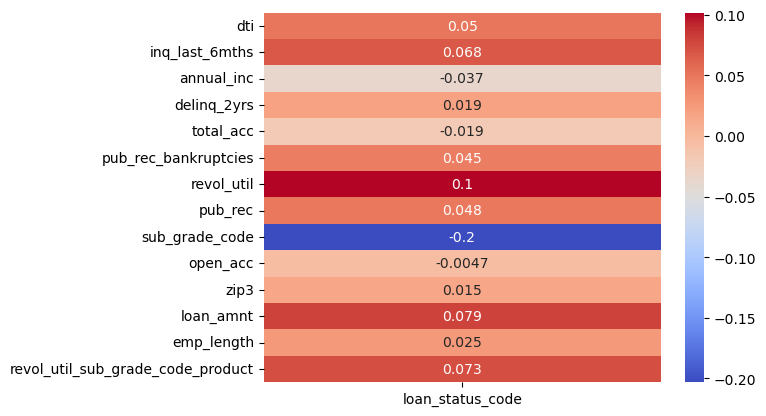

In [171]:
target_column = 'loan_status_code'
subset_columns = ['dti', 'inq_last_6mths', 'annual_inc', 'delinq_2yrs', 'total_acc', 
                  'pub_rec_bankruptcies', 'revol_util', 'pub_rec', 'sub_grade_code', 
                  'open_acc', 'zip3', 'loan_amnt', 'emp_length', 'revol_util_sub_grade_code_product']
correlations = df[subset_columns + [target_column]].corr()

# Create heatmap
sns.heatmap(correlations.loc[subset_columns, [target_column]], annot=True, cmap='coolwarm')
plt.show()

Here we can see that the loans subgrade had the highest correlation with risk of charging off relative to other factors

<Axes: title={'center': 'sub_grade_code'}, xlabel='loan_status'>

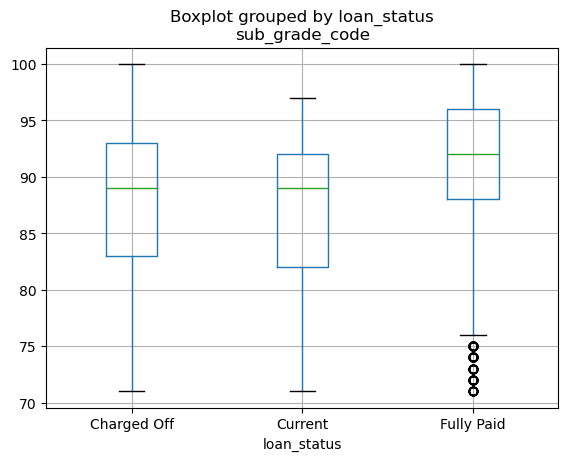

In [176]:
#Create a boxplot to compare Annual Income by Loan Status
df.boxplot(column='sub_grade_code', by='loan_status')

Text(0, 0.5, 'Loans Charged Off %')

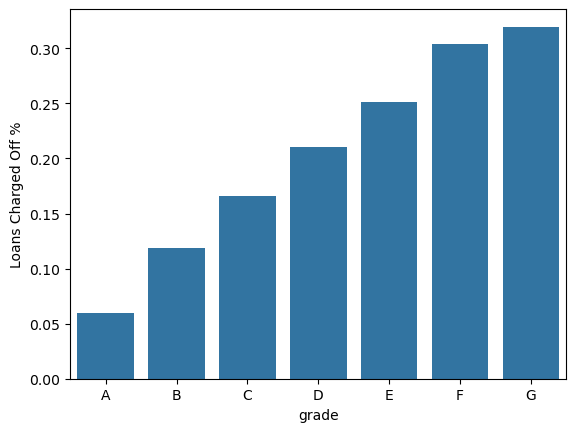

In [202]:
#Look at the Charge Off % by Grade to use for analysis
charge_off_pcnt_grade = df.groupby('grade')['loan_status'].value_counts(normalize=True)[:,'Charged Off']

#Plot Charge Off % by Grade
sns.barplot(x=charge_off_pcnt_grade.index, y=charge_off_pcnt_grade.values,) \
.set_ylabel('Loans Charged Off %')

Text(0, 0.5, 'Loans Charged Off %')

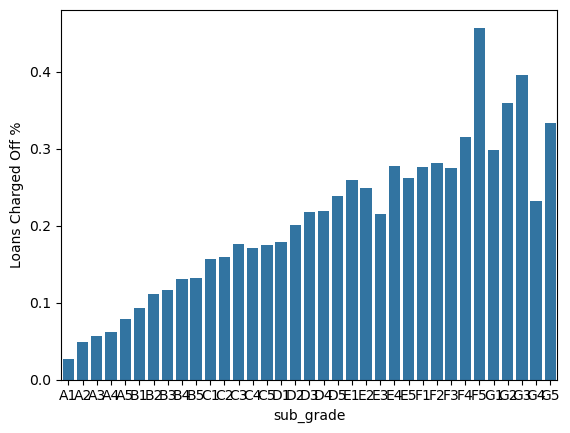

In [203]:
#Look at the Charge Off % by Sub-Grade to use for analysis
charge_off_pcnt_sub_grade = df.groupby('sub_grade')['loan_status'].value_counts(normalize=True)[:,'Charged Off']

#Plot Charge Off % by Sub-Grade
sns.barplot(x=charge_off_pcnt_sub_grade.index, y=charge_off_pcnt_sub_grade.values,) \
.set_ylabel('Loans Charged Off %')

Here we can see a linear relationship where as the grade and sub-grade increase so does the loan charged off %